# 🎬 Movie Success Prediction Project
This notebook presents a machine learning pipeline to predict the success of a movie using regression models. We use features such as budget, runtime, IMDB score, etc., and evaluate multiple models to select the best performer.


## 📥 Step 1: Load and Explore the Dataset
We begin by importing necessary libraries and loading the dataset. This step includes checking for missing values, understanding the shape, and previewing the data.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
# import joblit
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [ ]:
# Load dataset
df = pd.read_csv('movie_metadata.csv')
df.shape

(5043, 28)

In [ ]:
# Preview data

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## 🧹 Step 2: Data Cleaning
We remove or fill missing values, drop unnecessary columns, and clean the dataset to make it suitable for modeling.

In [ ]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

,0
gross,884
budget,492
aspect_ratio,329
content_rating,303
plot_keywords,153
title_year,108
director_facebook_likes,104
director_name,104
num_critic_for_reviews,50
actor_3_facebook_likes,23


In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)


## 🎯 Step 3: Feature Selection
From the cleaned dataset, we choose relevant features that influence movie success, such as budget, runtime, votes, and IMDB score.

In [ ]:
#drop rows with too many missing impotant values
df.dropna(subset=['gross', 'budget','imdb_score','title_year'], inplace=True)

In [ ]:
#fill remaining missing values
df.fillna({'content_rating': 'Not Rated', 'language': 'Unknown'}, inplace=True)

In [ ]:
# Create a new column 'Classify' based on IMDB Score ranges
def classify_movie(score):
    if score >= 1 and score < 3:
        return 'Flop'
    elif score >= 3 and score < 6:
        return 'Average'
    elif score >= 6 and score <= 10:
        return 'Hit'
    else:
        return 'Unknown'  # for invalid or missing values

# Apply the function to create the new column
df['Classify'] = df['imdb_score'].apply(classify_movie)

# Preview the updated DataFrame
df[['imdb_score', 'Classify']].head()


,imdb_score,Classify
0,7.9,Hit
1,7.1,Hit
2,6.8,Hit
3,8.5,Hit
5,6.6,Hit


In [ ]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Classify
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Hit
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Hit
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Hit
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Hit
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,Hit


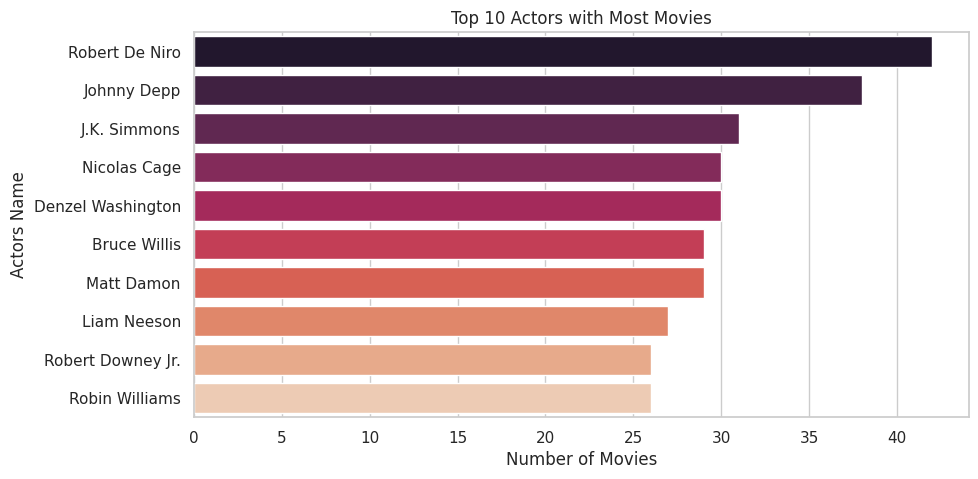

In [ ]:
#Top Actors With Most Movies
top_actors = df['actor_1_name'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_actors.values, y=top_actors.index,palette='rocket')
plt.title('Top 10 Actors with Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actors Name')
plt.show()

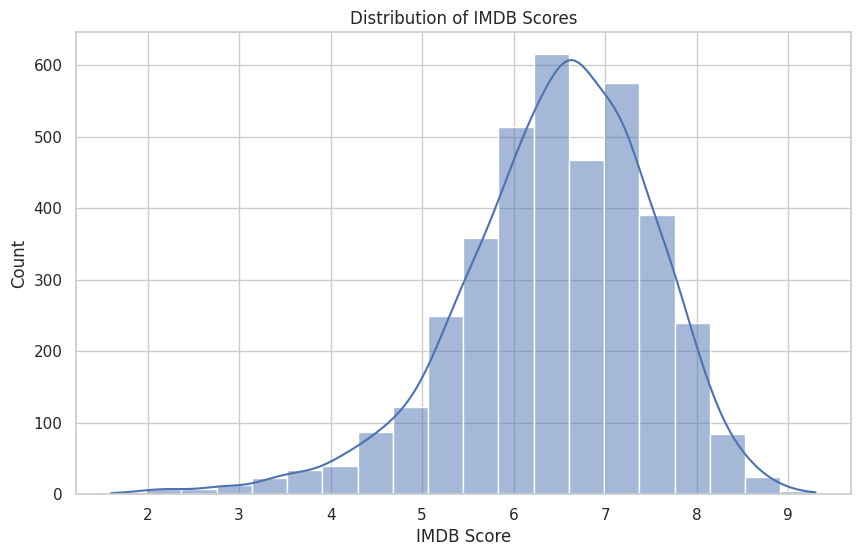

In [ ]:
#Distribution of IMBD score
plt.figure(figsize=(10,6))
sns.histplot(df['imdb_score'], bins=20, kde=True)
plt.title('Distribution of IMDB Scores')
plt.xlabel('IMDB Score')

plt.show()


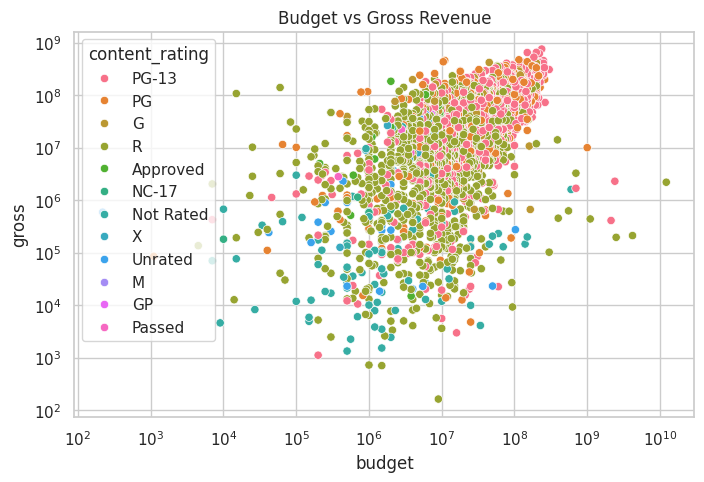

In [ ]:
#Budget vs gross
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='budget', y='gross',hue='content_rating' )
plt.title('Budget vs Gross Revenue')
plt.xscale('log')
plt.yscale('log')

plt.show()

In [ ]:
#Creat a new collume (main_genre)
df["main_genre"]=df['genres'].apply(lambda x: x.split("|")[0])
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Classify,main_genre
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Hit,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Hit,Action
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Hit,Action
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Hit,Action
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,Hit,Action


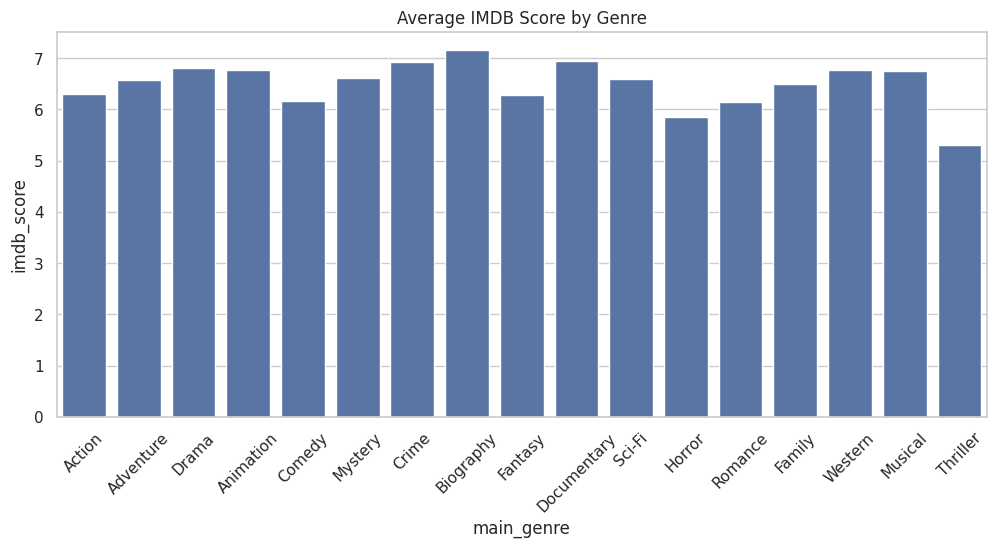

In [ ]:
#Average IMDB score by genre(main genre only)
plt.figure(figsize=(12,5))
sns.barplot(x='main_genre', y='imdb_score', data=df,ci=None )
plt.title('Average IMDB Score by Genre')
# plt.xlabel('Genre')
# plt.ylabel('Average IMDB Score')
plt.xticks(rotation=45)

plt.show()

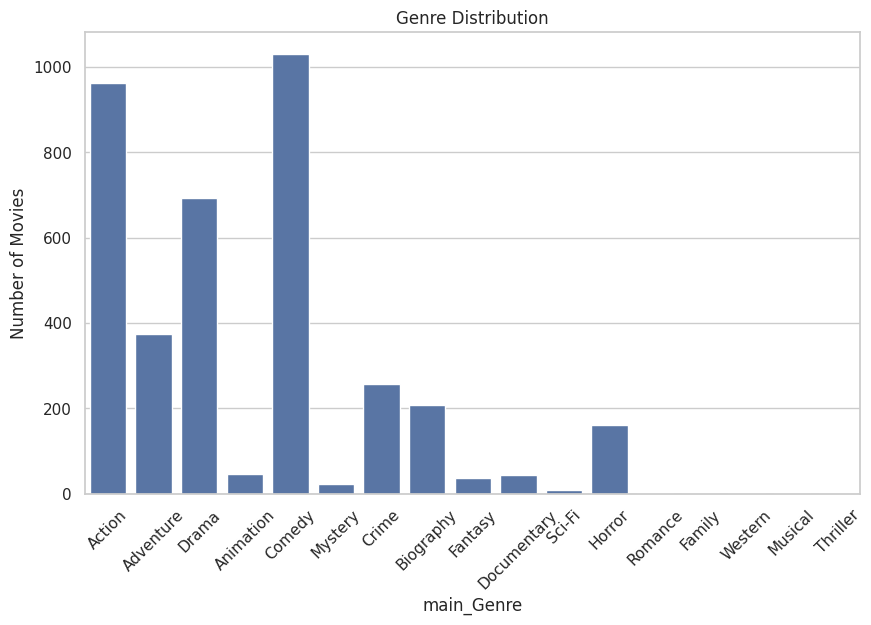

In [ ]:
#Genre Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='main_genre')
plt.title('Genre Distribution')
plt.xlabel('main_Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

plt.show()

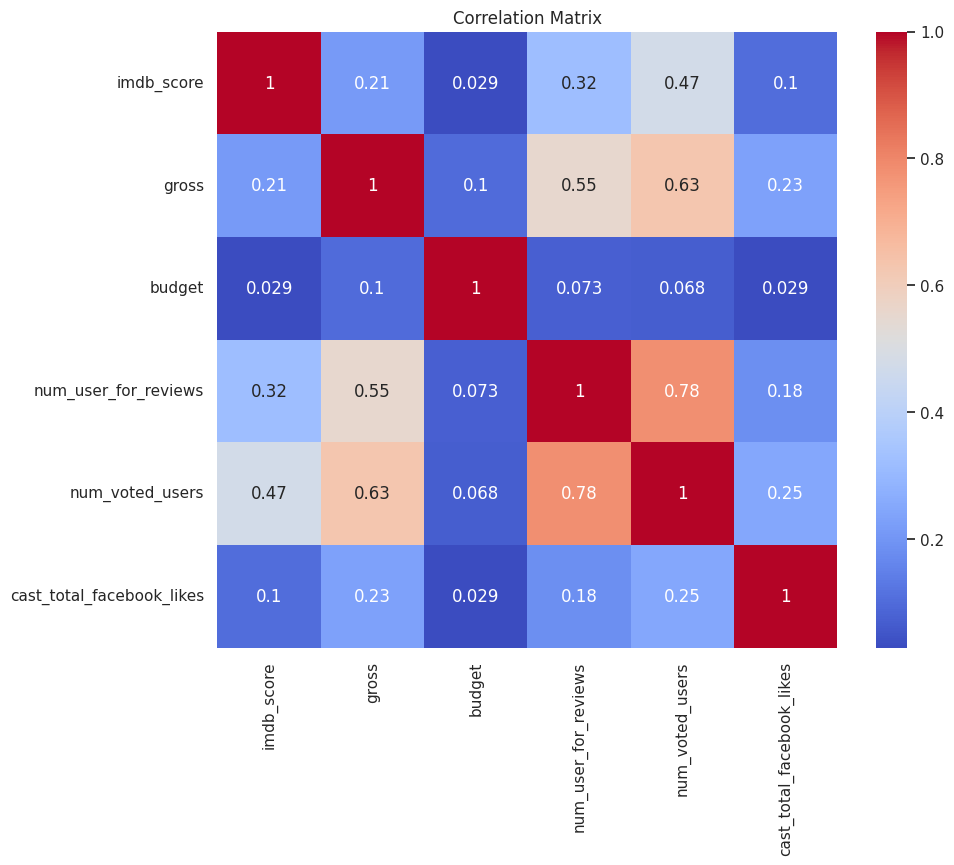

In [ ]:
corr=df[['imdb_score', 'gross', 'budget', 'num_user_for_reviews',
           'num_voted_users', 'cast_total_facebook_likes']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 🧪 Step 4: Train-Test Split
We split the data into training and testing sets to evaluate model performance fairly. Typically, we use 70-80% for training and the rest for testing.

In [ ]:
# Features and target
features = ['budget', 'num_voted_users', 'cast_total_facebook_likes']
X = df[features]
y = df['imdb_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

## 🤖 Step 5: Model Training
We train multiple regression models including:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor

Each model is fit on the training data and then evaluated.

### 5.1 Linear Regression Model
We start by training a simple Linear Regression model to understand the linear relationship between movie features and revenue.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
lr_predictions = lr_model.predict(X_test)
lr_score = r2_score(y_test, lr_predictions)

print(f"Linear Regression R² Score: {lr_score:.4f}")


### 5.2 Decision Tree Regressor
Next, we train a Decision Tree Regressor which can capture nonlinear relationships in the data.


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
dt_predictions = dt_model.predict(X_test)
dt_score = r2_score(y_test, dt_predictions)

print(f"Decision Tree R² Score: {dt_score:.4f}")


Decision Tree R² Score: -0.3423


### 5.3 Random Forest Regressor
Finally, we train a Random Forest Regressor which combines multiple decision trees for improved accuracy and generalization.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=45)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_predictions = rf_model.predict(X_test)
rf_score = r2_score(y_test, rf_predictions)

print(f"Random Forest R² Score: {rf_score:.4f}")


Random Forest R² Score: 0.2970


## ✅ Step 6: Choose the Best Model Based on R² Score
We evaluate the performance of Linear Regression, Decision Tree Regressor, and Random Forest Regressor models using R² score. The model with the highest R² is selected for final prediction.

In [ ]:


%who


ConfusionMatrixDisplay	 DecisionTreeRegressor	 LinearRegression	 RandomForestRegressor	 StandardScaler	 X	 X_test	 X_train	 classification_report	 
classify_movie	 confusion_matrix	 corr	 df	 dt_model	 dt_predictions	 dt_score	 features	 joblib	 
loaded_model	 lr_model	 lr_predictions	 lr_score	 mean_squared_error	 np	 pd	 plt	 r2_score	 
rf_model	 rf_predictions	 rf_score	 sns	 top_actors	 train_test_split	 warnings	 y	 y_test	 
y_train	 


In [ ]:
# Assuming Random Forest is the best based on earlier scores
# best_model = 'random_forest'

## ✅ Step 7: Save the Best Model Using Joblib
Saving the trained model allows us to reuse it in a Streamlit app or other environments without retraining.

In [ ]:
import joblib

# Save the best model (Random Forest)
joblib.dump(rf_model, 'best_movie_model.pkl')

print("✅ Random Forest model saved as 'best_movie_model.pkl'")


✅ Random Forest model saved as 'best_movie_model.pkl'


In [ ]:
loaded_model = joblib.load('best_movie_model.pkl')
print("Model type:", type(loaded_model))


Model type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
